In [46]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df=pd.read_csv(city_data_to_load)
ride_data_df=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset


# Display the data table for preview
#combine_data_df.head()



In [47]:
# let drop the duplicate data set
city_data_df=city_data_df.drop_duplicates("city")
# let verify the data set
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [48]:
# let's check the ride data
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [49]:
# combine the both data set
pyber_data_df=pd.merge(city_data_df, ride_data_df ,on="city", how="outer")
pyber_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

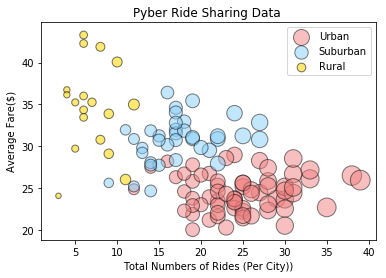

In [50]:
# Create separate data frames based on city types - Urban, Suburban and Rural
urban_city = pyber_data_df.loc[(pyber_data_df["type"] == "Urban")]
suburban_city = pyber_data_df.loc[(pyber_data_df["type"] == "Suburban")]
rural_city = pyber_data_df.loc[(pyber_data_df["type"] == "Rural")]
# Per city calculations of Average Fare, Total Rides and Total Drivers for Urban cities
avg_fare_urban_city = urban_city.groupby(['city'])['fare'].mean()
total_rides_urban_city = urban_city.groupby(['city']).count()['ride_id']
total_drivers_urban_city = urban_city.groupby(['city'])['driver_count'].value_counts()

# Per city calculations of Average Fare, Total Rides and Total Drivers for Suburban cities
avg_fare_suburban_city = suburban_city.groupby(['city'])['fare'].mean()
total_rides_suburban_city = suburban_city.groupby(['city']).count()['ride_id']
total_drivers_suburban_city = suburban_city.groupby(['city'])['driver_count'].value_counts()

# Per city calculations of Average Fare, Total Rides and Total Drivers for Rural cities
avg_fare_rural_city = rural_city.groupby(['city'])['fare'].mean()
total_rides_rural_city = rural_city.groupby(['city']).count()['ride_id']
total_drivers_rural_city = rural_city.groupby(['city'])['driver_count'].value_counts()
# Create scatter plots for Urban, Suburban and Rural cities
plt.scatter(total_rides_urban_city, avg_fare_urban_city,s=total_drivers_urban_city*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(total_rides_suburban_city, avg_fare_suburban_city,s=total_drivers_suburban_city*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(total_rides_rural_city, avg_fare_rural_city,s=total_drivers_rural_city*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")
# Chart title
plt.title("Pyber Ride Sharing Data ")
# x label
plt.xlabel("Total Numbers of Rides (Per City))")
# y label
plt.ylabel("Average Fare($)")
# legend 
plt.legend(loc='upper right')
# Save Figure
plt.savefig("../Images/Pyber Ride Ride.png")
plt.show()


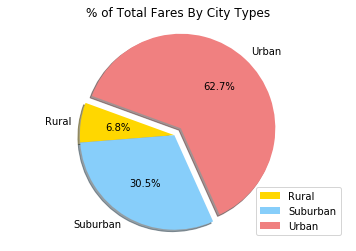

In [58]:
# Total Fares by City Type
total_fare=pyber_data_df.groupby(["type"])["fare"].sum()
#label for ecah type of city
labels=["Rural","Suburban","Urban"]
#the colors of each type of the pie chart
colors=["gold","lightskyblue","lightcoral"]
explode=(0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.legend(loc='lower right')

# save figure
plt.savefig("../Images/Total Fare by city type Ride.png")
plt.show()

## Total Rides by City Type

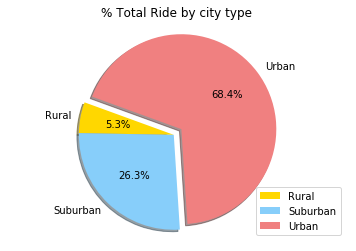

In [57]:
#
total_rides = pyber_data_df.groupby(["type"])["ride_id"].count()
#label for each ride
labels=["Rural","Suburban","Urban"]
# ccolors for type of ride
colors=["gold","lightskyblue","lightcoral"]
explode=(0, 0,0.1)

# Build Pie Chart
plt.title("% Total Ride by city type ")
plt.pie(total_rides,explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")
plt.legend(loc='lower right')


# Save Figure
plt.savefig("../Images/Total Rides by city type Ride.png")
plt.show()

## Total Drivers by City Type

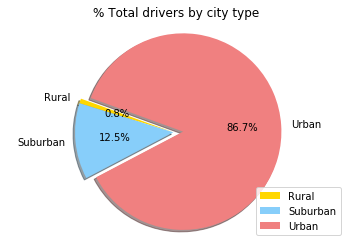

In [56]:
# Calculate Driver Percents
total_drivers = pyber_data_df.groupby(["type"])["driver_count"].sum()
labels=["Rural", "Suburban","Urban"]
colors=["gold","lightskyblue","lightcoral"]
explode=(0, 0, 0.1)
# Build Pie Charts
plt.title("% Total drivers by city type ")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow = True, startangle=160)
plt.axis("equal")
plt.legend(loc='lower right')

# Save Figure
plt.savefig("../Images/ Total Drivers by city type Ride.png")
plt.show()
